In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
#w=np.array([-.1,-.1,-.1,-.1,-.1, 0])
#w=np.array([-1,-1,-1,-1,-1, 0])
#c=np.array([  1,  1,  1,.01,100, 1e10])*1e-6
e1e2t=214298.32535430687
e3t=np.array([25.70331479, 26.28684983, 26.59728865, 26.75965336, 
              26.84381704, 26.88724213, 26.90959407, 26.92108493,
              26.9269885,  26.93002054, 26.93157752, 26.93237697,])
# step 2:
c=np.array([0.20426293, 0.17224638, 0.15749323, 0.14595926,
            0.1175629 , 0.09982128, 0.08699752, 0.07856428,
            0.06596047, 0.04474809, 0.13201024, 0.        ])
# step 0:
#c=np.array([0.20331727, 0.16865452, 0.15772118, 0.14340848,
#            0.11826674, 0.10116881, 0.08674008, 0.07820327,
#            0.06499595, 0.04768646, 0.1204031 , 0.])
w=-1*np.ones(np.shape(c))*2.8e-4
w[-1]=0
tmask=np.ones(np.shape(c))
tmask[-1]=0

In [3]:
#1. bottom value zero
zwz=np.zeros(np.shape(c))
#2. upstream advection
zwz[1:]=w[1:]*c[:-1]
zwz

array([ 0.00000000e+00, -5.71936204e-05, -4.82289864e-05, -4.40981044e-05,
       -4.08685928e-05, -3.29176120e-05, -2.79499584e-05, -2.43593056e-05,
       -2.19979984e-05, -1.84689316e-05, -1.25294652e-05,  0.00000000e+00])

In [4]:
dt=40*2


In [5]:
ztra=np.zeros(np.shape(c))
ztra[:-1]=-1*(zwz[:-1]-zwz[1:])/e1e2t
delc_upwind=ztra.copy() # ** added to tra at this step
zwi=(e3t*c+dt*ztra)/e3t*tmask # set fse3t's to 1
zwi # upwind increases low point from .01 to .0298 in one time step

array([0.20426293, 0.17224638, 0.15749323, 0.14595926, 0.1175629 ,
       0.09982128, 0.08699752, 0.07856428, 0.06596047, 0.04474809,
       0.13201024, 0.        ])

In [6]:
# 3. antidiffusive flux
zwz_sav=zwz.copy()

In [7]:
jnzts=20 # same as SSC

In [8]:
cb=c.copy()

In [9]:
ca=np.zeros(np.shape(c))
zwzts=np.zeros(np.shape(c))

In [10]:
for jl in range(0,jnzts):
    if jl==0:
        jtaken=np.mod(jnzts+1,2)
        print(jtaken)
        zts=dt/jnzts # z_rzts=1/jnzts
        cn=c.copy() # this makes first step euler
    elif jl==1:
        zts=2*dt/jnzts
    zwz[1:]=.5*w[1:]*(cn[1:]+cn[:-1])
    if jtaken==0:
        zwzts[1:]=zwzts[1:]+zwz[1:]*zts
    jtaken=np.mod(jtaken+1,2) # switch on/off
    
    zbtr=1/(e1e2t*e3t)
    ztra[1:-1]=-1*zbtr[1:-1]*(zwz[1:-1]-zwz[2:])
    ca[1:-1]=cb[1:-1]+zts*ztra[1:-1] # step forward
    # swap for next step:
    cb=cn.copy()
    cn=ca.copy()
    ca=np.zeros(np.shape(c))

1


In [11]:
cn

array([0.        , 0.17224638, 0.15749323, 0.14595926, 0.1175629 ,
       0.09982128, 0.08699752, 0.07856428, 0.06596047, 0.04474809,
       0.13201024, 0.        ])

In [12]:
zwzts

array([ 0.        , -0.00192916, -0.00369308, -0.00339867, -0.00295145,
       -0.0024347 , -0.00209237, -0.00185429, -0.00161868, -0.00123994,
       -0.00197969,  0.        ])

In [13]:
# anti-diffusive vertical flux using average flux from sub-timestepping
zwz=zwzts/dt-zwz_sav

In [14]:
zwz

array([ 0.00000000e+00,  3.30791272e-05,  2.06544102e-06,  1.61475579e-06,
        3.97549039e-06,  2.48382679e-06,  1.79532639e-06,  1.18065359e-06,
        1.76453339e-06,  2.96973320e-06, -1.22167010e-05,  0.00000000e+00])

In [15]:
zbig=1e40
zrtrn=1e-15

In [16]:
# 4. nonosc(pbef=ptb,zwx,zwy,pcc=zwz,paft=zwi,p2dt)
# zwi is after value based on upwind
pbef=c.copy()
paft=zwi.copy()
# search local extrema
zbup=np.maximum(pbef*tmask-zbig*(1-tmask),paft*tmask-zbig*(1-tmask))
zbup

array([ 2.04262930e-01,  1.72246380e-01,  1.57493230e-01,  1.45959260e-01,
        1.17562900e-01,  9.98212801e-02,  8.69975200e-02,  7.85642800e-02,
        6.59604700e-02,  4.47480901e-02,  1.32010240e-01, -1.00000000e+40])

In [17]:
zbdo=np.minimum(pbef*tmask+zbig*(1-tmask),paft*tmask+zbig*(1-tmask))
zbdo

array([2.04262929e-01, 1.72246380e-01, 1.57493230e-01, 1.45959260e-01,
       1.17562900e-01, 9.98212800e-02, 8.69975200e-02, 7.85642800e-02,
       6.59604700e-02, 4.47480900e-02, 1.32010240e-01, 1.00000000e+40])

In [18]:
zup=np.zeros(np.shape(c))
zdo=zup.copy()
zup[0]=np.maximum(zbup[0],zbup[1])
zup[1:-1]=np.maximum(np.maximum(zbup[:-2],zbup[1:-1]),zbup[2:])
#zup[-1]=np.maximum(zbup[-2],zbup[-1]) this is never calculated
zup

array([0.20426293, 0.20426293, 0.17224638, 0.15749323, 0.14595926,
       0.1175629 , 0.09982128, 0.08699752, 0.07856428, 0.13201024,
       0.13201024, 0.        ])

In [19]:
zdo[0]=np.minimum(zbdo[0],zbdo[1])
zdo[1:-1]=np.minimum(np.minimum(zbdo[:-2],zbdo[1:-1]),zbdo[2:])
#zdo[-1]=np.minimum(zbdo[-2],zbdo[-1])
zdo

array([0.17224638, 0.15749323, 0.14595926, 0.1175629 , 0.09982128,
       0.08699752, 0.07856428, 0.06596047, 0.04474809, 0.04474809,
       0.04474809, 0.        ])

(12, 0)

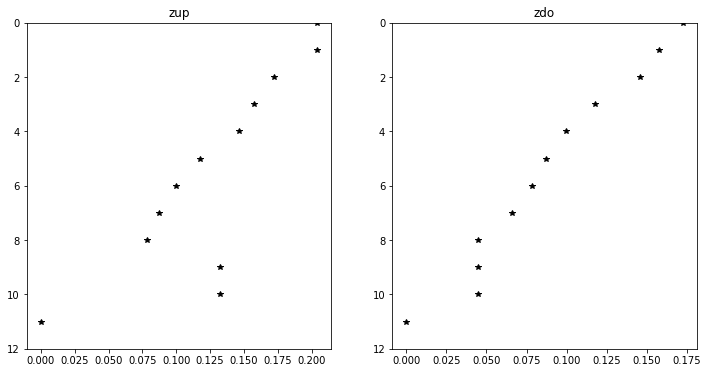

In [20]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].plot(zup,np.arange(0,len(zbup)),'k*')
ax[0].set_title('zup')
ax[0].set_ylim(12,0)
ax[1].plot(zdo,np.arange(0,len(zdo)),'k*')
ax[1].set_title('zdo')
ax[1].set_ylim(12,0)

In [21]:
zeros=np.zeros(np.shape(c))
pcc=zwz.copy()
zpos=np.zeros(np.shape(c))
zneg=zpos.copy()
zpos[:-1]=np.maximum(zeros[1:],pcc[1:])-np.minimum(zeros[:-1],pcc[:-1])
zneg[:-1]=np.maximum(zeros[:-1],pcc[:-1])-np.minimum(zeros[1:],pcc[1:])


In [22]:
zpos

array([3.30791272e-05, 2.06544102e-06, 1.61475579e-06, 3.97549039e-06,
       2.48382679e-06, 1.79532639e-06, 1.18065359e-06, 1.76453339e-06,
       2.96973320e-06, 0.00000000e+00, 1.22167010e-05, 0.00000000e+00])

In [23]:
zneg

array([0.00000000e+00, 3.30791272e-05, 2.06544102e-06, 1.61475579e-06,
       3.97549039e-06, 2.48382679e-06, 1.79532639e-06, 1.18065359e-06,
       1.76453339e-06, 1.51864342e-05, 0.00000000e+00, 0.00000000e+00])

(12, 0)

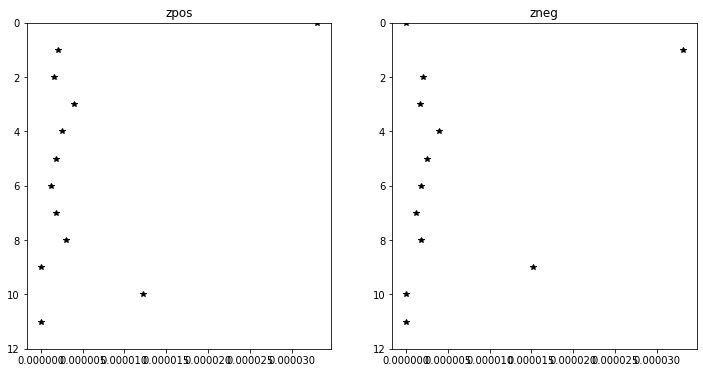

In [24]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].plot(zpos,np.arange(0,len(zpos)),'k*')
ax[0].set_title('zpos')
ax[0].set_ylim(12,0)
ax[1].plot(zneg,np.arange(0,len(zneg)),'k*')
ax[1].set_title('zneg')
ax[1].set_ylim(12,0)

In [25]:
#! up & down beta terms
zbt = e1e2t*e3t / dt
zbetup = ( zup - paft) / ( zpos + zrtrn ) * zbt
zbetdo = ( paft - zdo ) / ( zneg + zrtrn ) * zbt


In [26]:
zbetup

array([1.72899423e+00, 1.09151339e+09, 6.50944656e+08, 2.07968416e+08,
       8.22080649e+08, 7.11745790e+08, 7.82940619e+08, 3.44656067e+08,
       3.06126543e+08, 6.29493695e+18, 0.00000000e+00, 0.00000000e+00])

In [27]:
zbetdo

array([2.20441037e+18, 3.14049462e+07, 3.97861741e+08, 1.26056457e+09,
       3.20904368e+08, 3.71851147e+08, 3.38600023e+08, 7.69840408e+08,
       8.67113790e+08, 3.91103431e-01, 6.29530090e+18, 0.00000000e+00])

(12, 0)

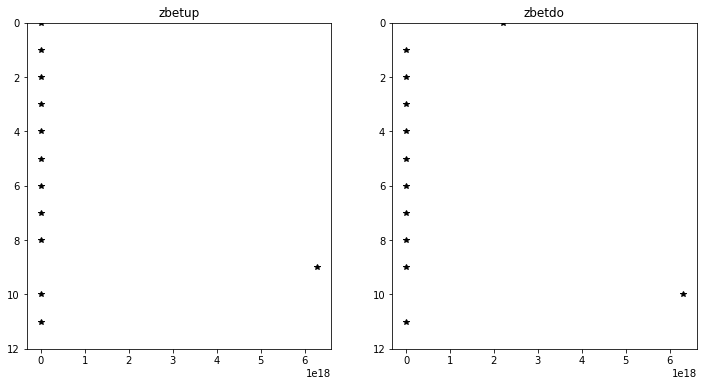

In [28]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].plot(zbetup,np.arange(0,len(zbetup)),'k*')
ax[0].set_title('zbetup')
ax[0].set_ylim(12,0)
ax[1].plot(zbetdo,np.arange(0,len(zbetdo)),'k*')
ax[1].set_title('zbetdo')
ax[1].set_ylim(12,0)

In [29]:
#! monotonic flux in the k direction, i.e. pcc
ones=np.ones(np.shape(c))
za=zeros.copy()
zb=zeros.copy()
zc=zeros.copy()
za[:-1] = np.minimum(np.minimum( ones[1:], zbetdo[1:]), zbetup[:-1] )
zb[:-1] = np.minimum(np.minimum( ones[1:], zbetup[1:]), zbetdo[:-1] )
zc[:-1]=np.where(pcc[1:]<0,0,1)
#zc[:-1]=.5+np.abs(pcc[1:])/pcc[1:]*.5
#zc =       ( 0.5  + SIGN( 0.5 , pcc(ji,jj,jk+1) ) )
# SIGN(A,B) returns value of A with sign of B
pcc[1:]=pcc[1:]*(zc[:-1]*za[:-1]+(1-zc[:-1])*zb[:-1])
#pcc(ji,jj,jk+1) = pcc(ji,jj,jk+1) * ( zc * za + ( 1._wp - zc) * zb )

In [30]:
pcc

array([ 0.00000000e+00,  3.30791272e-05,  2.06544102e-06,  1.61475579e-06,
        3.97549039e-06,  2.48382679e-06,  1.79532639e-06,  1.18065359e-06,
        1.76453339e-06,  1.16147284e-06, -0.00000000e+00,  0.00000000e+00])

In [31]:
# before nonosc, zwz contains difference between centered substepped leapfrog and upwind:
zwz

array([ 0.00000000e+00,  3.30791272e-05,  2.06544102e-06,  1.61475579e-06,
        3.97549039e-06,  2.48382679e-06,  1.79532639e-06,  1.18065359e-06,
        1.76453339e-06,  2.96973320e-06, -1.22167010e-05,  0.00000000e+00])

In [32]:
# after nonosc, zwz (pcc) is adjusted so that only one element changes from upwind 

In [33]:
# 5. final trend with corrected fluxes
ztra=0*ztra
ztra2=ztra.copy()
ztra[:-1]=-1*zbtr[:-1]*(pcc[:-1]-pcc[1:])
ztra2[:-1]=-1*zbtr[:-1]*(zwz[:-1]-zwz[1:])

In [34]:
# total change is ztra+delc, ztra is after nonosc adjustment
ztra

array([ 6.00545794e-12, -5.50549113e-12, -7.90709900e-14,  4.11668753e-13,
       -2.59303181e-13, -1.19492091e-13, -1.06590395e-13,  1.01207364e-13,
       -1.04509160e-13, -2.01258207e-13,  0.00000000e+00,  0.00000000e+00])

In [35]:
ztra2 # this is before nonosc version

array([ 6.00545794e-12, -5.50549113e-12, -7.90709900e-14,  4.11668753e-13,
       -2.59303181e-13, -1.19492091e-13, -1.06590395e-13,  1.01207364e-13,
        2.08858663e-13, -2.63148168e-12,  2.11676855e-12,  0.00000000e+00])

In [36]:
delc_upwind

array([-2.66887855e-10,  4.18324968e-11,  1.92763149e-11,  1.50701672e-11,
        3.71023935e-11,  2.31810192e-11,  1.67553937e-11,  1.10187851e-11,
        1.64680092e-11,  2.77158787e-11,  5.84673967e-11,  0.00000000e+00])

In [37]:
delc_upwind+ztra

array([-2.60882397e-10,  3.63270056e-11,  1.91972439e-11,  1.54818360e-11,
        3.68430903e-11,  2.30615271e-11,  1.66488033e-11,  1.11199925e-11,
        1.63635001e-11,  2.75146205e-11,  5.84673967e-11,  0.00000000e+00])

In [38]:
delc_upwind+ztra2

array([-2.60882397e-10,  3.63270056e-11,  1.91972439e-11,  1.54818360e-11,
        3.68430903e-11,  2.30615271e-11,  1.66488033e-11,  1.11199925e-11,
        1.66768679e-11,  2.50843971e-11,  6.05841653e-11,  0.00000000e+00])

In [39]:
c

array([0.20426293, 0.17224638, 0.15749323, 0.14595926, 0.1175629 ,
       0.09982128, 0.08699752, 0.07856428, 0.06596047, 0.04474809,
       0.13201024, 0.        ])